# Practical Statistics for Data Scientists (Python)
# Chapter 1. Exploratory Data Analysis

Import required Python packages.

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import scipy.stats
import scipy.stats
from scipy.stats import trim_mean
from scipy import stats
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

print("Imports Done!")

Imports Done!


Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [2]:
DATA = "~/PycharmProjects/Datasets/"
mtcar_path = DATA + "mtcars.csv"
mtcar = pd.read_csv(mtcar_path)

In [3]:
mtcar.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
mtcar.shape

(32, 12)

In [5]:
mtcar.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [6]:
mtcar_df = mtcar.copy()

In [7]:
mtcar_df = mtcar_df.rename(columns={"Unnamed: 0" : "Car Model"})

In [8]:
mtcar_df["vs"] = mtcar_df["vs"].replace({0 : "V", 1 : "S"})

In [9]:
mtcar_df["am"] = mtcar_df["am"].replace({0 : "Auto", 1 : "Manual"})

In [10]:
result = mtcar_df["qsec"][(mtcar_df["cyl"] != 3) & (mtcar_df["mpg"] > 20)].mean()
result

18.81642857142857

In [11]:
mtcar_df.groupby(["vs", "am"]).agg({"hp" : "mean"})

hp
vs am                
S  Auto    102.142857
   Manual   80.571429
V  Auto    194.166667
   Manual  180.833333

In [12]:
mtcar_df.groupby("am").agg("median")

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
am,,,,,,,,,
Auto,17.3,8,275.8,175,3.15,3.52,17.82,3,3
Manual,22.8,4,120.3,109,4.08,2.32,17.02,4,2


In [13]:
mtcar_df.groupby("am").agg("median")

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
am,,,,,,,,,
Auto,17.3,8,275.8,175,3.15,3.52,17.82,3,3
Manual,22.8,4,120.3,109,4.08,2.32,17.02,4,2


In [14]:
mtcar_df.groupby(["am", "vs"]).agg("std").iloc[:,[0,2]]

mpg       disp
am     vs                     
Auto   S   2.471071  49.130725
       V   2.774396  71.823494
Manual S   4.757701  18.802128
       V   4.008865  95.233616

In [15]:
my_stats = mtcar_df.groupby(["am", "vs"]).agg("std").iloc[:,[0,2]]

In [16]:
descriptions_stat = mtcar_df.groupby(["am"]).agg("std").loc[:, ["hp", "disp"]]
descriptions_stat

,hp,disp
am,,
Auto,53.908196,110.171647
Manual,84.062324,87.203989


In [17]:
round(mtcar_df.groupby(["am", "vs"]).agg({"qsec" : ["count", "min", "max", "mean", "std", "sem"]}), 2)

qsec                                 
          count    min    max   mean   std   sem
am     vs                                       
Auto   S      7  18.30  22.90  19.97  1.46  0.55
       V     12  15.41  18.00  17.14  0.80  0.23
Manual S      7  16.90  19.90  18.70  0.95  0.36
       V      6  14.50  17.02  15.80  1.09  0.45

In [18]:
mtcar_df.isna().sum()

Car Model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

Dealing with NA 

In [19]:
# mtcar_df.head(15)

In [20]:
# mtcar_df["mpg"].mean()

In [21]:
# mtcar_df["mpg"].iloc[1:10] = None

In [22]:
# mtcar_df.head(15)

In [23]:
# mtcar_df["mpg"].mean()

<AxesSubplot:xlabel='mpg', ylabel='Count'>

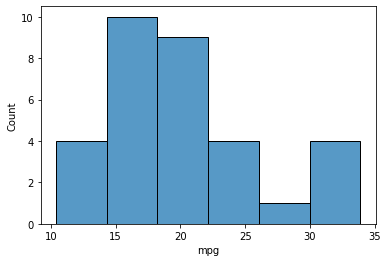

In [24]:
sns.histplot(mtcar_df["mpg"])

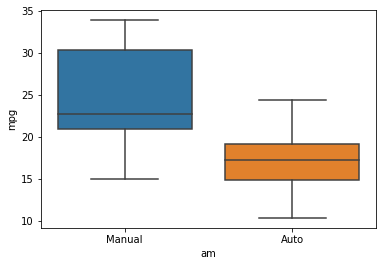

In [25]:
ax = sns.boxplot(x="am", y="mpg", data=mtcar_df)

<AxesSubplot:xlabel='mpg', ylabel='hp'>

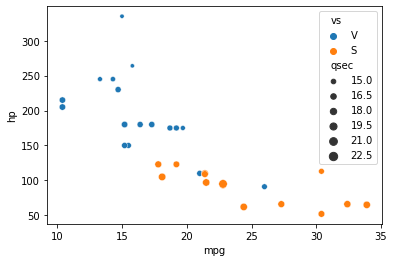

In [26]:
sns.scatterplot(data=mtcar_df, x="mpg", y="hp", hue="vs", size= "qsec")

<AxesSubplot:xlabel='mpg', ylabel='disp'>

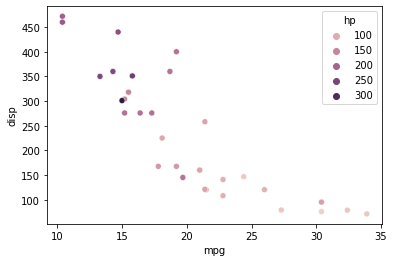

In [27]:
sns.scatterplot(data=mtcar_df, x="mpg", y="disp", hue="hp")

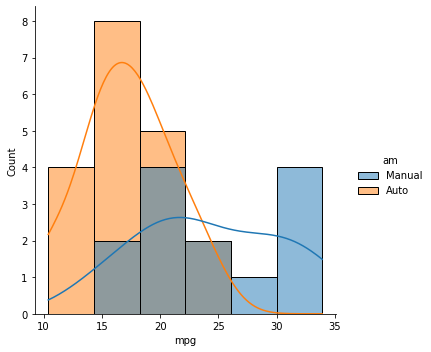

In [28]:
sns.displot(data=mtcar_df, x="mpg", hue="am", kde=True)

In [29]:
mtcar_df.head()

,Car Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V,Manual,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V,Manual,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,S,Manual,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,S,Auto,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V,Auto,3,2


In [30]:
d = mtcar_df.groupby(["vs", "am"])["am"].count().unstack()
d

am,Auto,Manual
vs,,
S,7,7
V,12,6


In [31]:
p_value = scipy.stats.fisher_exact(d)[1]

In [32]:
# Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# mtcar_path = PATH_TO_DATA + "mtcars.csv"
# mtcar = pd.read_csv(mtcar_path)
# d = mtcar.groupby(["vs", "am"])["am"].count().unstack()
# p_value = scipy.stats.fisher_exact(d)[1]

### NEW DATASET 

In [33]:
DATA = "~/PycharmProjects/Datasets/"
airquality_path = DATA + "airquality.csv"
airquality = pd.read_csv(airquality_path)

In [34]:
airquality = airquality.drop("Unnamed: 0", axis=1)

In [35]:
airquality.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


In [36]:
airquality_df = airquality.copy()

In [37]:
airquality_df.loc[airquality_df.Month >= 7]
# ИЛИ
airquality_df.query("Month >= 7")

,Ozone,Solar.R,Wind,Temp,Month,Day
61,135.0,269.0,4.1,84,7,1
62,49.0,248.0,9.2,85,7,2
63,32.0,236.0,9.2,81,7,3
64,NaN,101.0,10.9,84,7,4
65,64.0,175.0,4.6,83,7,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [38]:
aq_ss = airquality_df.query("Month >= 7")

In [39]:
aq_ss.groupby("Month").agg({"Ozone" : "count"})
# ИЛИ 
# airquality_df.query("Month >= 7").groupby("Month").agg({"Ozone" : "count"})

,Ozone
Month,
7,26
8,26
9,29


<AxesSubplot:xlabel='Month', ylabel='Ozone'>

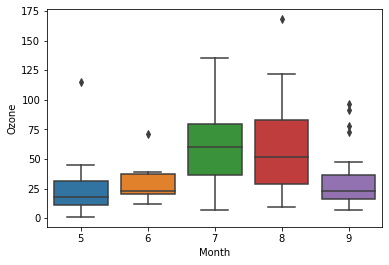

In [40]:
sns.boxplot(x="Month", y="Ozone", data=airquality_df)

### NEW DATASET

In [41]:
DATA = "~/PycharmProjects/Datasets/"
iris_path = DATA + "iris.csv"
iris = pd.read_csv(iris_path, index_col=0)

In [42]:
iris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [43]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
iris.agg("std")

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [45]:
iris[iris.Species == "virginica"].median().sort_values(ascending=False)

Sepal.Length    6.50
Petal.Length    5.55
Sepal.Width     3.00
Petal.Width     2.00
dtype: float64

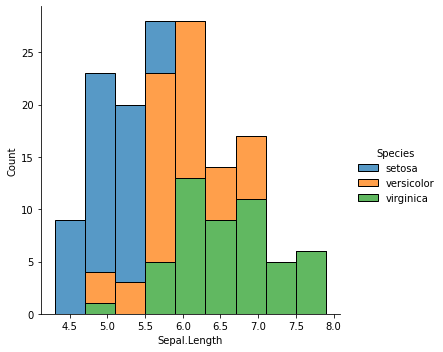

In [46]:
sns.displot(data=iris, x="Sepal.Length", hue="Species", multiple="stack")

In [47]:
iris_df = iris[iris.Species != "setosa"]

<AxesSubplot:xlabel='Sepal.Length', ylabel='Count'>

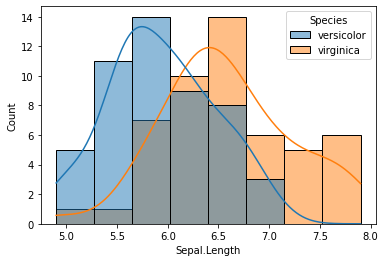

In [48]:
sns.histplot(iris_df, x="Sepal.Length", kde=True, hue="Species")

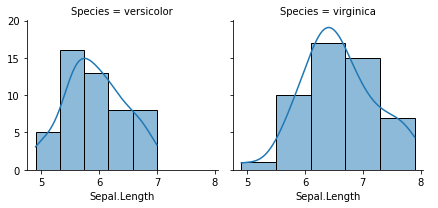

In [49]:
g = sns.FacetGrid(iris_df, col="Species")
g.map(sns.histplot, "Sepal.Length", kde=True, bins=5)
g.add_legend()

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid - IMBA

<AxesSubplot:xlabel='Sepal.Length', ylabel='Count'>

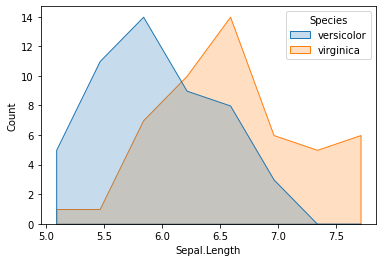

In [50]:
sns.histplot(iris_df, x="Sepal.Length", hue="Species", element="poly") 

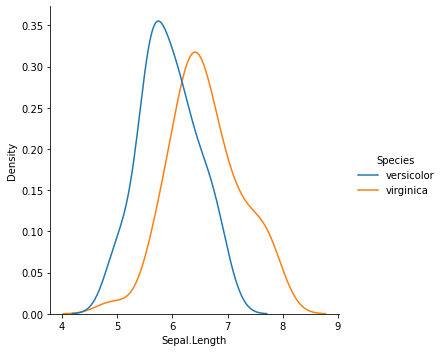

In [51]:
sns.displot(iris_df, x="Sepal.Length", hue="Species", kind="kde")

<AxesSubplot:xlabel='Sepal.Length', ylabel='Density'>

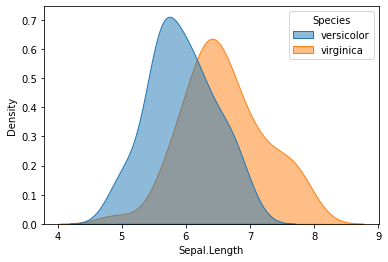

In [52]:
sns.kdeplot(data=iris_df, x="Sepal.Length", hue="Species", fill=True, common_norm=False, alpha=.5, linewidth=1)

<AxesSubplot:xlabel='Species', ylabel='Sepal.Length'>

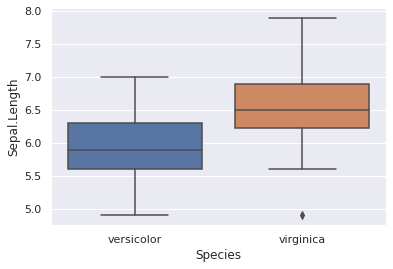

In [53]:
sns.set_theme(style="darkgrid")
sns.boxplot(y="Sepal.Length", x="Species", data=iris_df)

In [54]:
# Perform the Shapiro-Wilk test for normality.
shapiro_test = stats.shapiro(iris_df["Sepal.Length"])
shapiro_test

ShapiroResult(statistic=0.9805403351783752, pvalue=0.1464301496744156)

In [55]:
shapiro_test_1 = stats.shapiro(iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
shapiro_test_2 = stats.shapiro(iris_df[iris_df.Species == "virginica"]["Sepal.Length"])
[shapiro_test_1, shapiro_test_2]

[ShapiroResult(statistic=0.9778355956077576, pvalue=0.46473264694213867),
 ShapiroResult(statistic=0.9711798429489136, pvalue=0.25832483172416687)]

In [56]:
# Perform Bartlett’s test for equal variances.
# Гомогенность дисперсии проверяем, короче.
stat, p = scipy.stats.bartlett(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                               iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print("The test statistic is {}. \nThe p-value of the test is {}.".format(stat, p))

The test statistic is 2.094933311010139. 
The p-value of the test is 0.14778816016231236.


In [57]:
# Calculate the T-test for the means of two independent samples of scores.
t_test = scipy.stats.ttest_ind(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                               iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]) #, equal_var=True
t_test

Ttest_indResult(statistic=5.629165259719801, pvalue=1.7248563024547942e-07)

In [58]:
# Проверяем гипотезу о том, что среднее значение длины чашелистика в генеральной совокупности (датасете) равно 8.
# Для этого используем одновыборочный Т-тест. 
t_test = scipy.stats.ttest_1samp(iris_df["Sepal.Length"], 8) 
t_test

Ttest_1sampResult(statistic=-26.22072564309469, pvalue=2.3864526432268e-46)

Как и следовало ожидать - нет, среднее значение "Sepal.Length" не равно 8.

In [59]:
import numpy as np
import scipy.stats

# Самописная фукнция с просторов интернета, которая вычисляет доверительный интервал. Полезно!
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [60]:
mean_confidence_interval(iris_df["Sepal.Length"])

(6.2620000000000005, 6.130479266795949, 6.393520733204052)

In [61]:
# Расчёт доверительных интервалов
import numpy as np, scipy.stats as st

a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]
b = iris_df[iris_df.Species == "virginica"]["Sepal.Length"]

print(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)),
      st.t.interval(0.95, len(b)-1, loc=np.mean(b), scale=st.sem(b)))
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html?highlight=scipy%20stats%20t#scipy.stats.t

(5.789305783299542, 6.082694216700458) (6.4072850193549105, 6.768714980645086)


In [62]:
print(mean_confidence_interval(a),
      mean_confidence_interval(b))

(5.936, 5.789305783299542, 6.082694216700458) (6.587999999999998, 6.4072850193549105, 6.768714980645086)


Вывод - самописная функция повторяет метод .interval из библиотеки scipy.

Отлично!

In [63]:
print(a.quantile([0.05, 0.95]), "\n\n",
      b.quantile([0.05, 0.95]))
print("\n\n")
print(iris_df["Sepal.Length"].quantile([0.05, 0.95]))

0.05    5.045
0.95    6.755
Name: Sepal.Length, dtype: float64 

 0.05    5.745
0.95    7.700
Name: Sepal.Length, dtype: float64



0.05    5.195
0.95    7.605
Name: Sepal.Length, dtype: float64


Итого - метод квантиль какой-то странный. Что-то тут не так, очевидно. Лучше его не использовать. 

Надо бы разобраться, почему такая разница.

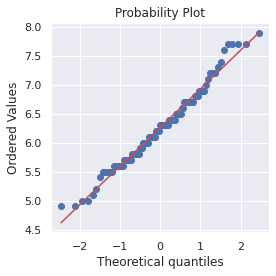

In [64]:
fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(iris_df["Sepal.Length"], plot=ax)

plt.tight_layout()
plt.show()

In [65]:
# Парный Т-тест
pt_test = scipy.stats.ttest_rel(iris_df["Sepal.Length"], iris_df["Sepal.Width"])
pt_test

Ttest_relResult(statistic=61.30714401143194, pvalue=1.4790717979416083e-80)

Для визуализации "планок погрешностей" можно использовать:

- matplotlib, а именно matplotlib.pyplot.errorbar: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html

- seaborn.pointplot: https://seaborn.pydata.org/generated/seaborn.pointplot.html

In [66]:
iris_df.Species.unique()

array(['versicolor', 'virginica'], dtype=object)

In [67]:
a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"].mean()
a

5.936

<ErrorbarContainer object of 3 artists>

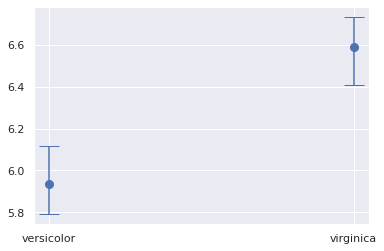

In [68]:
# Хехе, получилось!
a_origin = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]
a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"].mean()
b_origin = iris_df[iris_df.Species == "virginica"]["Sepal.Length"]
b = iris_df[iris_df.Species == "virginica"]["Sepal.Length"].mean()

plt.errorbar(x=iris_df.Species.unique(), y=[a, b], 
             yerr=[a-st.t.interval(0.95, len(a_origin)-1, loc=np.mean(a_origin), scale=st.sem(a_origin)), 
                  b-st.t.interval(0.95, len(b_origin)-1, loc=np.mean(b_origin), scale=st.sem(b_origin))],
             data=iris_df, fmt="o", markersize=8, capsize=10) # fmt="-o", "--o", ".k"

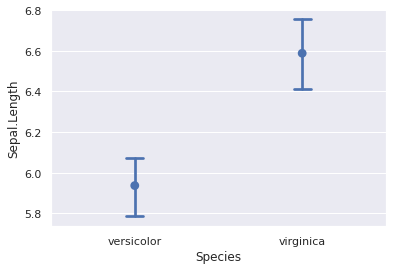

In [69]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="Species", y="Sepal.Length", data=iris_df, join=False, capsize=.1)

In [70]:
# Непараметрический тест на нормальность (Манна-Уитни), в англоязычной литературе - Уилкоксона
wtest = scipy.stats.wilcoxon(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                            iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print(wtest)
mw_test = scipy.stats.mannwhitneyu(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                                   iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print(mw_test)
# Получается, что реализации этих тестов различаются в R и Python. Подробности по ссылке:
# https://stackoverflow.com/questions/33579785/difference-between-wilcoxon-test-in-r-and-python
# Вывод - Можно использовать и Python, но если p-value различаются, то лучше полагаться на R.
# Однако, немаловажно отметить, что тест Бартлетта и Т-тест совпадают. 

WilcoxonResult(statistic=171.0, pvalue=1.883485656410222e-05)
MannwhitneyuResult(statistic=526.0, pvalue=2.9345032053320985e-07)


In [151]:
# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_15 (1).txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# df.head()

In [152]:
# stat, p = scipy.stats.bartlett(df[df.V2 == 1]["V1"], 
#                                df[df.V2 == 2]["V1"])
# print("The test statistic is {}. \nThe p-value of the test is {}.".format(stat, p))

In [ ]:
# wtest = scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], 
#                              df[df.V2 == 2]["V1"], mode='approx')
# wtest

In [ ]:
# scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_15.txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# print(scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1]) if (scipy.stats.bartlett(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1] < 0.05) else print(scipy.stats.ttest_ind(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1])

In [74]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_16.txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# print("{} {} {}".format(df.V1.mean(),df.V2.mean(),scipy.stats.ttest_ind(df.V1, df.V2)[1])) if (scipy.stats.ttest_ind(df.V1, df.V2)[1] < 0.05) else print("The difference is not significant")

### NEW DATASET

In [75]:
DATA = "~/PycharmProjects/Datasets/"
tooth_path = DATA + "ToothGrowth.csv"
toothgrowth = pd.read_csv(tooth_path, index_col=0)

In [76]:
toothgrowth.head(10)

,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5
7,11.2,VC,0.5
8,11.2,VC,0.5
9,5.2,VC,0.5
10,7.0,VC,0.5


In [77]:
toothgrowth.shape

(60, 3)

In [78]:
toothgrowth.describe()

,len,dose
count,60.000000,60.000000
mean,18.813333,1.166667
std,7.649315,0.628872
min,4.200000,0.500000
25%,13.075000,0.500000
50%,19.250000,1.000000
75%,25.275000,2.000000
max,33.900000,2.000000


In [79]:
subset_oj = toothgrowth[(toothgrowth.supp == "OJ") & (toothgrowth.dose == 0.5)]
subset_vc = toothgrowth[(toothgrowth.supp == "VC") & (toothgrowth.dose == 2.0)]

In [80]:
t_test = scipy.stats.ttest_ind(subset_oj.len, subset_vc.len) 
t_test.statistic

-6.232482137515355

In [81]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# tooth_path = PATH_TO_DATA + "ToothGrowth.csv"
# toothgrowth = pd.read_csv(tooth_path, index_col=0)
# t_test = scipy.stats.ttest_ind(toothgrowth[(toothgrowth.supp == "OJ") & (toothgrowth.dose == 0.5)].len, 
#                                toothgrowth[(toothgrowth.supp == "VC") & (toothgrowth.dose == 2.0)].len) 
# print(t_test.statistic)

### NEW DATASET

In [82]:
DATA = "~/PycharmProjects/Datasets/"
lec_path = DATA + "lekarstva.csv"
lekarstva = pd.read_csv(lec_path, index_col=0)

In [83]:
print(lekarstva.shape)
lekarstva.head()

(174, 5)


,Uroven_sahara_v_krovi,Pressure_before,Pressure_after,Holesterin (Aprel),Holesterin (Mart)
Group,,,,,
2,90,170,135,235,205
2,85,160,155,185,195
1,95,165,155,235,260
1,86,170,165,155,136
2,104,170,165,260,250


In [84]:
lekarstva.describe()

,Uroven_sahara_v_krovi,Pressure_before,Pressure_after,Holesterin (Aprel),Holesterin (Mart)
count,174.000000,174.000000,174.000000,174.000000,174.000000
mean,103.988506,172.097701,156.724138,239.195402,233.097701
std,35.608499,13.855017,15.183418,49.510165,51.975057
min,68.000000,140.000000,125.000000,120.000000,113.000000
25%,86.000000,160.000000,150.000000,202.000000,196.250000
50%,95.500000,170.000000,155.000000,235.000000,228.000000
75%,110.000000,180.000000,163.750000,271.000000,261.000000
max,352.000000,220.000000,210.000000,381.000000,401.000000


In [85]:
lec_pair_t_test = scipy.stats.ttest_rel(lekarstva.Pressure_after, lekarstva.Pressure_before) 
lec_pair_t_test.statistic

-14.226730711863198

In [88]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# lec_path = PATH_TO_DATA + "lekarstva.csv"
# lekarstva = pd.read_csv(lec_path, index_col=0)
# lec_pair_t_test = scipy.stats.ttest_rel(lekarstva.Pressure_before, lekarstva.Pressure_after) 
# print(lec_pair_t_test.statistic)

## NEW CHAPTER AND NEW DATASET

In [89]:
DATA = "~/PycharmProjects/Datasets/"
grants_path = DATA + "grants.csv"
grants = pd.read_csv(grants_path)

In [90]:
grants.head()

,npersons,years_in_uni,oldest_age,field,RFCD.Code.1,midpoint,status
0,2.0,< 5,66.0,bio,270799,24999.5,1
1,1.0,< 5,51.0,bio,270106,24999.5,0
2,1.0,< 5,36.0,bio,270708,24999.5,0
3,1.0,5-10,46.0,bio,270603,24999.5,0
4,4.0,> 10,46.0,physics,240402,24999.5,1


In [91]:
grants.shape

(1420, 7)

In [92]:
grants.isna().sum()

npersons          7
years_in_uni      0
oldest_age       57
field             0
RFCD.Code.1       0
midpoint        586
status            0
dtype: int64

In [93]:
grants.describe()

,npersons,oldest_age,RFCD.Code.1,midpoint,status
count,1413.000000,1363.000000,1420.000000,834.000000,1420.000000
mean,1.991507,46.220103,283534.757746,56534.272182,0.473944
std,1.402623,10.049217,43515.351061,84821.226389,0.499497
min,1.000000,25.000000,240100.000000,24999.500000,0.000000
25%,1.000000,38.000000,270103.000000,24999.500000,0.000000
50%,2.000000,46.000000,270210.000000,24999.500000,0.000000
75%,2.000000,53.000000,270702.000000,49999.500000,1.000000
max,15.000000,77.000000,380399.000000,499999.500000,1.000000


In [94]:
grants_df = grants.copy()

In [95]:
grants_df["status"] = grants_df["status"].replace({0 : "Not funded", 1 : "Funded"})

In [96]:
grants_df["status"].unique()

array(['Funded', 'Not funded'], dtype=object)

In [97]:
grants_df.head(3)

,npersons,years_in_uni,oldest_age,field,RFCD.Code.1,midpoint,status
0,2.0,< 5,66.0,bio,270799,24999.5,Funded
1,1.0,< 5,51.0,bio,270106,24999.5,Not funded
2,1.0,< 5,36.0,bio,270708,24999.5,Not funded


In [98]:
table_1 = pd.pivot_table(grants_df, index="status", values="field", aggfunc="count")
table_1

,field
status,
Funded,673
Not funded,747


In [99]:
table_2 = pd.pivot_table(grants_df, index=["field"], columns=["status"], aggfunc="count")
table_2

RFCD.Code.1            midpoint            npersons             \
status       Funded Not funded   Funded Not funded   Funded Not funded   
field                                                                    
beh_cog          65        100       52         25       65         99   
bio             432        473      374        192      431        470   
chem             66         60       58         18       66         60   
physics          78         70       60         15       77         70   
soc              32         44       30         10       32         43   

        oldest_age            years_in_uni             
status      Funded Not funded       Funded Not funded  
field                                                  
beh_cog         61         97           65        100  
bio            423        450          432        473  
chem            64         58           66         60  
physics         76         62           78         70  
soc             32         40           32         44

In [100]:
# Неудачные попытки
# -----------------------------
# grants_df.groupby(["field", "status"]).agg({"status" : "count"}).unstack()
# -----------------------------
# table_2 = grants_df.pivot_table(index="status", columns=["field"], aggfunc="count")
# table_2

In [101]:
dist = grants_df.groupby(["field", "status"])["status"].count().unstack()
dist

status,Funded,Not funded
field,,
beh_cog,65,100
bio,432,473
chem,66,60
physics,78,70
soc,32,44


In [102]:
# Binom test
p_value_1 = scipy.stats.binom_test(table_1)
p_value_1

array([0.05268034])

In [103]:
# ChiSquare test
cs_res_1 = scipy.stats.chisquare(table_1)
print(cs_res_1)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(cs_res_1[0], cs_res_1[1]))

Power_divergenceResult(statistic=array([3.85633803]), pvalue=array([0.04955838]))
The chi-squared test statistic is [3.85633803]; 
The p-value of the test is [0.04955838].


In [104]:
cs_res_2 = scipy.stats.chisquare(dist.T)
cs_res_2

Power_divergenceResult(statistic=array([7.42424242, 1.85745856, 0.28571429, 0.43243243, 1.89473684]), pvalue=array([0.00643509, 0.17291841, 0.5929801 , 0.5107978 , 0.16866862]))

### New Dataset

In [105]:
DATA = "~/PycharmProjects/Datasets/"
hec_path = DATA + "HairEyeColor.csv"
hec = pd.read_csv(hec_path)

In [106]:
hec = hec.drop("Unnamed: 0", axis=1)

In [107]:
hec.head()

,Hair,Eye,Sex,Freq
0,Black,Brown,Male,32
1,Brown,Brown,Male,53
2,Red,Brown,Male,10
3,Blond,Brown,Male,3
4,Black,Blue,Male,11


In [108]:
hec_fem = hec[hec.Sex == "Female"]
hec_fem

,Hair,Eye,Sex,Freq
16,Black,Brown,Female,36
17,Brown,Brown,Female,66
18,Red,Brown,Female,16
19,Blond,Brown,Female,4
20,Black,Blue,Female,9
21,Brown,Blue,Female,34
22,Red,Blue,Female,7
23,Blond,Blue,Female,64
24,Black,Hazel,Female,5
25,Brown,Hazel,Female,29


In [109]:
# Неудачные попытки
# sns.histplot(data=hec_fem, x="Hair", y="Freq")

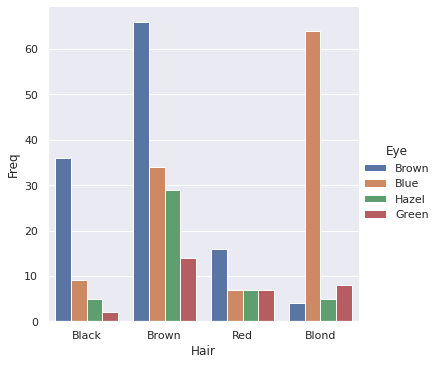

In [110]:
sns.catplot(data=hec_fem, x="Hair", y="Freq", hue="Eye", kind="bar")

In [111]:
# Как сделать хорошо и правильно? - Посмотри туториалы.
# titanic = sns.load_dataset("titanic")
# sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

In [112]:
hec_fem[hec_fem.Hair == "Brown"].iloc[:,[1, 3]]

,Eye,Freq
17,Brown,66
21,Blue,34
25,Hazel,29
29,Green,14


In [113]:
brown_haired_ladies = hec_fem[hec_fem.Hair == "Brown"].iloc[:,[1, 3]].set_index("Eye")
brown_haired_ladies

,Freq
Eye,
Brown,66
Blue,34
Hazel,29
Green,14


In [114]:
cs_res_3 = scipy.stats.chisquare(brown_haired_ladies)
print(cs_res_3)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(cs_res_3[0], cs_res_3[1]))

Power_divergenceResult(statistic=array([40.18881119]), pvalue=array([9.71700305e-09]))
The chi-squared test statistic is [40.18881119]; 
The p-value of the test is [9.71700305e-09].


In [115]:
DATA = "~/PycharmProjects/Datasets/"
hec_path = DATA + "HairEyeColor.csv"
hec = pd.read_csv(hec_path, index_col=0)
brown_haired_ladies = hec.query("Sex == 'Female' and Hair == 'Brown'").iloc[:,[1, 3]].set_index("Eye")
chisquare_result = scipy.stats.chisquare(brown_haired_ladies)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(chisquare_result[0], chisquare_result[1]))

The chi-squared test statistic is [40.18881119]; 
The p-value of the test is [9.71700305e-09].


### New Dataset

In [116]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [117]:
diamonds = diamonds.sort_values(by=['color', 'cut'])

<AxesSubplot:xlabel='color', ylabel='Count'>

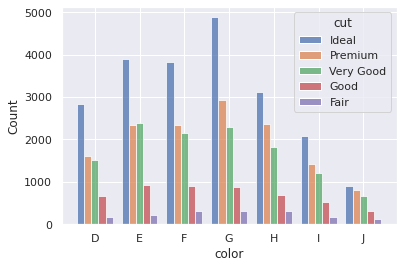

In [118]:
sns.histplot(data=diamonds, x="color", hue="cut", multiple="dodge", shrink=.8)

In [119]:
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = diamonds.sort_values(by=['color', 'cut'])
# sns.histplot(data=diamonds, x="color", hue="cut", multiple="dodge", shrink=.7)

In [120]:
diamonds = sns.load_dataset('diamonds')
diamonds = pd.DataFrame(diamonds)
# d = diamonds.groupby(['cut', 'color']).agg({"color" : "count"}).unstack()
d = diamonds.groupby(['cut', 'color'])['cut'].count().unstack()
print(d.shape)
d

(5, 7)


color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


In [121]:
# НЕПРАВИЛЬНО!

# chisquare_result = scipy.stats.chisquare(d, axis=None)
# chisquare_result
# -------------------------------------------------------------
# ПРАВИЛЬНО!
chisquare_result = scipy.stats.chi2_contingency(d)
chisquare_result

(310.3179005211542,
 1.3945120919852248e-51,
 24,
 array([[2706.85993697, 3914.25930664, 3812.37749351, 4511.56640712,
         3317.7512792 , 2166.28702262, 1121.89855395],
        [1732.18437152, 2504.82808676, 2439.63147942, 2887.05917686,
         2123.1083426 , 1386.25884316,  717.92969967],
        [1517.52966259, 2194.42628847, 2137.30893585, 2529.29076752,
         1860.00978865, 1214.47170931,  628.96284761],
        [ 616.2059696 ,  891.06566555,  867.87267334, 1027.04026696,
          755.27296997,  493.1466815 ,  255.39577308],
        [ 202.22005933,  292.42065258,  284.80941787,  337.04338154,
          247.85761958,  161.83574342,   83.8131257 ]]))

In [122]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = pd.DataFrame(diamonds)
# d = diamonds.groupby(['cut', 'color'])['cut'].count().unstack()
# chisquare_result = scipy.stats.chi2_contingency(d)
# chisquare_result

In [123]:
# table_diamonds = pd.pivot_table(diamonds, index=["cut"], columns=["color"], aggfunc="count")
# table_diamonds

In [124]:
diamonds["factor_price"] = np.where(diamonds['price'] >= diamonds.price.mean(), 1, 0)
diamonds["factor_carat"] = np.where(diamonds['carat'] >= diamonds.carat.mean(), 1, 0)

In [125]:
d = diamonds.groupby(['factor_carat', 'factor_price'])['factor_price'].count().unstack()
d

factor_price,0,1
factor_carat,,
0,30929,198
1,3354,19459


In [126]:
chisquare_result = scipy.stats.chi2_contingency(d)
chisquare_result[0]

40735.2227968624

In [127]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import numpy as np
# import scipy.stats
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = pd.DataFrame(diamonds)
# diamonds["factor_price"] = np.where(diamonds['price'] >= diamonds.price.mean(), 1, 0)
# diamonds["factor_carat"] = np.where(diamonds['carat'] >= diamonds.carat.mean(), 1, 0)
# d = diamonds.groupby(['factor_carat', 'factor_price'])['factor_price'].count().unstack()
# chisquare_result = scipy.stats.chi2_contingency(d)
# chisquare_result[0]

### Game: Megafon and N+1
#### https://nplus1.ru/material/2020/10/27/megafon

In [128]:
import re

In [129]:
PATH_TO_DATA = "~/Downloads/Megafon_and_Nplus1_Game/"
game_df_1 = pd.read_csv(PATH_TO_DATA + "first.csv", sep=";", header=None)
game_df_1.head(10)

,0,1,2,3
0,h0yp8,87d6c39e-ffeb-49db-a699-71bb5c294c0b,5405.00,выменял шило на правокрыла
1,3403080000,861100907,пожертвование Фонду спасения кубических черепах,NaN
2,a8a8f4f8-6b19-4cb3-b7ef-368e39353105,КРПОТП,"добрая пословица не в бровь, а прямо в пятимер...",NaN
3,h6iok,478000457,3105.00,NaN
4,3403339200,ГДПВК,пожертвование Гильдии добровольной поддержки в...,NaN
5,3403598400,696600277,пожертвование Ассоциации поддержки леворуких п...,NaN
6,e9d8805a-7ff4-4cf9-a9dc-30bd805fcbd4,ФСКЧ,кубической черепахи в мешке не утаишь,NaN
7,hhmor,451800503,5290.00,NaN
8,3403857600,МАЗП,пожертвование Международной академии задиванны...,NaN
9,hlc2n,ed99959b-5161-48b2-9bc4-ee5e21d5cd03,5175.00,без вампира-короеда не вынешь рыбку из пруда


In [130]:
game_df_1.columns = ["transaction_id", "company_name", "transaction_amount", "comment"]
game_df_1

,transaction_id,company_name,transaction_amount,comment
0,h0yp8,87d6c39e-ffeb-49db-a699-71bb5c294c0b,5405.00,выменял шило на правокрыла
1,3403080000,861100907,пожертвование Фонду спасения кубических черепах,NaN
2,a8a8f4f8-6b19-4cb3-b7ef-368e39353105,КРПОТП,"добрая пословица не в бровь, а прямо в пятимер...",NaN
3,h6iok,478000457,3105.00,NaN
4,3403339200,ГДПВК,пожертвование Гильдии добровольной поддержки в...,NaN
5,3403598400,696600277,пожертвование Ассоциации поддержки леворуких п...,NaN
6,e9d8805a-7ff4-4cf9-a9dc-30bd805fcbd4,ФСКЧ,кубической черепахи в мешке не утаишь,NaN
7,hhmor,451800503,5290.00,NaN
8,3403857600,МАЗП,пожертвование Международной академии задиванны...,NaN
9,hlc2n,ed99959b-5161-48b2-9bc4-ee5e21d5cd03,5175.00,без вампира-короеда не вынешь рыбку из пруда


In [131]:
type(game_df_1.iloc[:,1])

pandas.core.series.Series

In [132]:
game_df_1[game_df_1.iloc[:,1].str.contains(r'([a-z|0-9]{8})(-[a-z|0-9]{4}){3}(-[a-z|0-9]{12})', regex=True)]

/home/aleksey/PycharmProjects/Practical_Statistics/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,transaction_id,company_name,transaction_amount,comment
0,h0yp8,87d6c39e-ffeb-49db-a699-71bb5c294c0b,5405.00,выменял шило на правокрыла
9,hlc2n,ed99959b-5161-48b2-9bc4-ee5e21d5cd03,5175.00,без вампира-короеда не вынешь рыбку из пруда
13,hwg0y,9904c0e7-9ad6-403c-ab7b-9e31ac21487a,4830.00,красавица без ума что кошелек без пылееда
17,i7k1y,a8a8f4f8-6b19-4cb3-b7ef-368e39353105,2530.00,"добрая слава до порога, а худая за одноглаза"
21,iio2q,e9d8805a-7ff4-4cf9-a9dc-30bd805fcbd4,4370.00,на всякого егорку есть кубическая черепаха
25,1upt,87d6c39e-ffeb-49db-a699-71bb5c294c0b,3105.00,от правокрыла добра не ищут
34,m82b,ed99959b-5161-48b2-9bc4-ee5e21d5cd03,3565.00,"лучше один раз увидеть, чем вампира-короеда ус..."
38,xc1j,9904c0e7-9ad6-403c-ab7b-9e31ac21487a,4485.00,после пылееда кулаками не машут


In [133]:
# PATH_TO_DATA = "~/Downloads/Megafon_and_Nplus1_Game/"

game_df_2 = pd.read_csv(PATH_TO_DATA + "dva.csv", sep=";", verbose=True)
game_df_2.head(10)

Tokenization took: 0.03 ms
Type conversion took: 0.27 ms
Parser memory cleanup took: 0.00 ms


,3402993600,АПЛП,пожертвование Ассоциации поддержки леворуких правокрылов
h2tdq,e9d8805a-7ff4-4cf9-a9dc-30bd805fcbd4,5060.00,"ни рыба, ни мясо, ни кафтан, ни кубическая чер..."
3403166400,451800503,пожертвование Кружку разведения пятимерных одн...,NaN
9904c0e7-9ad6-403c-ab7b-9e31ac21487a,МАЗП,"у кого что болит, тот задиванный пылеед",NaN
h8dcl,411700659,3450.00,NaN
hdxek,87d6c39e-ffeb-49db-a699-71bb5c294c0b,5635.00,"правокрыл греет, позор жжет"
3403684800,861100907,пожертвование Фонду спасения кубических черепах,NaN
a8a8f4f8-6b19-4cb3-b7ef-368e39353105,КРПОТП,"учёный водит, одноглаз следом ходит",NaN
hjhd0,478000457,3565.00,NaN
3403944000,ГДПВК,пожертвование Гильдии добровольной поддержки в...,NaN
3404203200,696600277,пожертвование Ассоциации поддержки леворуких п...,NaN


# NEW CHAPTER
# ANOVA

Он же - дисперсионный анализ: однофакторный и многофакторный.

In [134]:
import sys

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

In [135]:
DATA = "~/PycharmProjects/Datasets/"
shops_path = DATA + "shops.csv"
shops = pd.read_csv(shops_path, index_col=0)
shops.head()

,price,store,origin
food,,,
chocolate,100.30,supermarket,russia
chocolate,55.57,minimarket,russia
chocolate,268.62,minimarket,import
chocolate,196.81,supermarket,import
bread,10.91,minimarket,russia


In [136]:
shops.index.unique()

Index(['chocolate', 'bread', 'vegetables', 'fruits', 'cheese'], dtype='object', name='food')

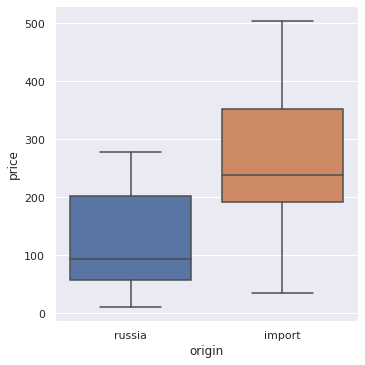

In [137]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="origin", y="price", data=shops, kind="box")

In [138]:
model = smf.ols('price ~ origin', data=shops).fit()
model.summary() if str(input()) == "1" else print(model.summary())

1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     6.650
Date:                Sun, 01 Nov 2020   Prob (F-statistic):             0.0189
Time:                        20:17:15   Log-Likelihood:                -122.90
No. Observations:                  20   AIC:                             249.8
Df Residuals:                      18   BIC:                             251.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          261.3700     37.619      6.948      0.000     182.336     340.404
origin[T.russia]  -137.1910     53.201     -2.579      0.019    -248.962     -25.420
==============================================================================
Omnibus:                        0.194   Durbin-Watson:                   1.067
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.335
Skew:                           0.191   Prob(JB):                        0.846
Kurtosis:                       2.495   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
origin,1.0,94106.852405,94106.852405,6.649892,0.018926
Residual,18.0,254729.450490,14151.636138,NaN,NaN


In [140]:
model_2 = smf.ols('price ~ origin + store', data=shops).fit()
model_2.summary() if str(input()) == "1" else print(model_2.summary())

2
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     3.278
Date:                Sun, 01 Nov 2020   Prob (F-statistic):             0.0625
Time:                        20:17:18   Log-Likelihood:                -122.78
No. Observations:                  20   AIC:                             251.6
Df Residuals:                      17   BIC:                             254.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              273.578

In [141]:
aov_table_2 = sm.stats.anova_lm(model_2)
aov_table_2

,df,sum_sq,mean_sq,F,PR(>F)
origin,1.0,94106.852405,94106.852405,6.354820,0.021987
store,1.0,2980.949445,2980.949445,0.201297,0.659342
Residual,17.0,251748.501045,14808.735356,NaN,NaN


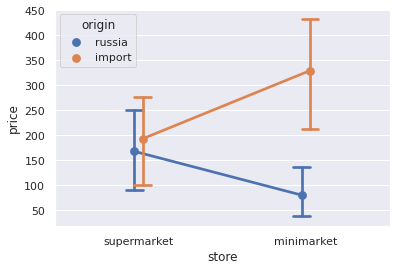

In [142]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="store", y="price", hue="origin", data=shops, join=True, capsize=.1, dodge=True)

In [143]:
model_3 = smf.ols('price ~ origin + store + origin:store', data=shops).fit() # same result: 'price ~ origin * store' 
model_3.summary() if str(input()) == "1" else print(model_3.summary())

2
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     4.512
Date:                Sun, 01 Nov 2020   Prob (F-statistic):             0.0178
Time:                        20:17:20   Log-Likelihood:                -119.91
No. Observations:                  20   AIC:                             247.8
Df Residuals:                      16   BIC:                             251.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [144]:
aov_table_3 = sm.stats.anova_lm(model_3)
aov_table_3

,df,sum_sq,mean_sq,F,PR(>F)
origin,1.0,94106.852405,94106.852405,7.967925,0.012252
store,1.0,2980.949445,2980.949445,0.252394,0.622238
origin:store,1.0,62777.133005,62777.133005,5.315272,0.034867
Residual,16.0,188971.368040,11810.710503,NaN,NaN


In [145]:
DATA = "~/PycharmProjects/Datasets/"
npk_path = DATA + "npk.csv"
npk = pd.read_csv(npk_path, index_col=0)
npk = npk.rename(columns={"yield" : "growth"})
npk.head()

,block,N,P,K,growth
1,1,0,1,1,49.5
2,1,1,1,0,62.8
3,1,0,0,0,46.8
4,1,1,0,1,57.0
5,2,1,0,0,59.8


In [146]:
model_npk = smf.ols('growth ~ N * P', data=npk).fit()
model_npk.summary() if str(input()) == "1" else print(model_npk.summary())

2
                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     2.221
Date:                Sun, 01 Nov 2020   Prob (F-statistic):              0.117
Time:                        20:17:22   Log-Likelihood:                -73.777
No. Observations:                  24   AIC:                             155.6
Df Residuals:                      20   BIC:                             160.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.7167      2.341     22.096      0

In [147]:
aov_table_npk = sm.stats.anova_lm(model_npk)
aov_table_npk.unstack()["PR(>F)"]["N:P"]

0.4304878274077424

In [148]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# DATA = "~/PycharmProjects/Datasets/"
# npk_path = DATA + "npk.csv"
# npk = pd.read_csv(npk_path, index_col=0)
# npk = npk.rename(columns={"yield" : "growth"}) # Пришлось переименовать столбец, иначе функция из библиотеки statsmodels.formula.api "спотыкается" о формулу
# model_npk = smf.ols('growth ~ N * P', data=npk).fit()
# aov_table_npk = sm.stats.anova_lm(model_npk)
# aov_table_npk.unstack()["PR(>F)"]["N:P"]